# Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

import os.path
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# Load Data

In [11]:
import pandas as pd

# Function to transform CSV into Dataframe
def csv_to_dataframe(csv):
    
    data = pd.read_csv(csv)
    
    # Remove first row if description
    if data.iloc[0][0].startswith('#') == True:
        data.drop(index=data.index[0], axis=0, inplace=True)
    
    # Convert dates to datetime type
    if 'Date_reported' in data.columns:
        data['Date_reported'] = pd.to_datetime(data['Date_reported'])
    elif 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])
        
    return data

In [12]:
# Death & Cases data
data_cases_deaths = csv_to_dataframe("/Users/julienberthomier/code/AmElmo/Main_Projects/Covid_tracking_dashboard/csv_files/covid_cases_deaths_who.csv")

# Vaccination data
data_vaccination = csv_to_dataframe("/Users/julienberthomier/code/AmElmo/Main_Projects/Covid_tracking_dashboard/csv_files/vaccination_data_who.csv")


/var/folders/xv/g2v5smfx4tzczxl151xsh9tr0000gn/T/ipykernel_73118/888285169.py:5: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  data_vaccination = csv_to_dataframe("/Users/julienberthomier/code/AmElmo/Main_Projects/Covid_tracking_dashboard/csv_files/vaccination_data_who.csv")


# Dictionaries to JSON

These dictionaries will be re-used in order to get incidence (from population) and final name of the country (from country codes). 

In [ ]:
# First we define a function that will generate a dictionary of the population for each country 
# It will be re-used whenever we need to calculate incidence per 100k people

def dict_population(data):
    
    country_codes = data['Country_code'].unique()
    dict_population = {}

    for code in country_codes:
        response = requests.get("https://restcountries.com/v2/alpha/", params={'codes':code})
        
        # Ignore 404 responses and only include countries with >= 300000 inhabitants
        if response.status_code == 200 and response.json()[0]['population'] >= 300000:
            population = response.json()[0]['population']
            dict_population[code] = population
            print(dict_population)
        else:
            continue

    return dict_population

dictionary_population = dict_population(data)

dictionary_population

In [145]:
# First we define a function that will generate a dictionary of the population for each country 
# It will be re-used whenever we need to calculate incidence per 100k people

def dict_population_iso(data):
    
    country_codes = data['iso_code'].unique()
    dict_population = {}

    for code in country_codes:
        response = requests.get("https://restcountries.com/v2/alpha/", params={'codes':code})
        
        # Ignore 404 responses and only include countries with >= 300000 inhabitants
        if response.status_code == 200 and response.json()[0]['population'] >= 300000:
            population = response.json()[0]['population']
            dict_population[code] = population
            print(code)
        else:
            continue

    return dict_population

dictionary_population_iso = dict_population_iso(data_vaccination)

dictionary_population_iso

AFG
ALB
DZA
AGO
ARG
ARM
AUS
AUT
AZE
BHS
BHR
BGD
BLR
BEL
BLZ
BEN
BTN
BOL
BIH
BWA
BRA
BRN
BGR
BFA
BDI
KHM
CMR
CAN
CPV
CAF
TCD
CHL
CHN
COL
COM
COG
CRI
CIV
HRV
CUB
CYP
CZE
COD
DNK
DJI
DOM
ECU
EGY
SLV
GNQ
EST
SWZ
ETH
FJI
FIN
FRA
GAB
GMB
GEO
DEU
GHA
GRC
GTM
GIN
GNB
GUY
HTI
HND
HKG
HUN
ISL
IND
IDN
IRN
IRQ
IRL
ISR
ITA
JAM
JPN
JOR
KAZ
KEN
KWT
KGZ
LAO
LVA
LBN
LSO
LBR
LBY
LTU
LUX
MAC
MDG
MWI
MYS
MDV
MLI
MLT
MRT
MUS
MEX
MDA
MNG
MNE
MAR
MOZ
MMR
NAM
NPL
NLD
NZL
NIC
NER
NGA
MKD
NOR
OMN
PAK
PSE
PAN
PNG
PRY
PER
PHL
POL
PRT
QAT
ROU
RUS
RWA
SAU
SEN
SRB
SLE
SGP
SVK
SVN
SLB
SOM
ZAF
KOR
SSD
ESP
LKA
SDN
SUR
SWE
CHE
SYR
TWN
TJK
TZA
THA
TLS
TGO
TTO
TUN
TUR
TKM
UGA
UKR
ARE
GBR
USA
URY
UZB
VUT
VEN
VNM
YEM
ZMB
ZWE


{'AFG': 40218234,
 'ALB': 2837743,
 'DZA': 44700000,
 'AGO': 32866268,
 'ARG': 45376763,
 'ARM': 2963234,
 'AUS': 25687041,
 'AUT': 8917205,
 'AZE': 10110116,
 'BHS': 393248,
 'BHR': 1701583,
 'BGD': 164689383,
 'BLR': 9398861,
 'BEL': 11555997,
 'BLZ': 397621,
 'BEN': 12123198,
 'BTN': 771612,
 'BOL': 11673029,
 'BIH': 3280815,
 'BWA': 2351625,
 'BRA': 212559409,
 'BRN': 437483,
 'BGR': 6927288,
 'BFA': 20903278,
 'BDI': 11890781,
 'KHM': 16718971,
 'CMR': 26545864,
 'CAN': 38005238,
 'CPV': 555988,
 'CAF': 4829764,
 'TCD': 16425859,
 'CHL': 19116209,
 'CHN': 1402112000,
 'COL': 50882884,
 'COM': 869595,
 'COG': 5518092,
 'CRI': 5094114,
 'CIV': 26378275,
 'HRV': 4047200,
 'CUB': 11326616,
 'CYP': 1207361,
 'CZE': 10698896,
 'COD': 89561404,
 'DNK': 5831404,
 'DJI': 988002,
 'DOM': 10847904,
 'ECU': 17643060,
 'EGY': 102334403,
 'SLV': 6486201,
 'GNQ': 1402985,
 'EST': 1331057,
 'SWZ': 1160164,
 'ETH': 114963583,
 'FJI': 896444,
 'FIN': 5530719,
 'FRA': 67391582,
 'GAB': 2225728,
 'GM

In [ ]:
# Function to generate dictionary of country codes & country names with > 300.000 inhabitants

def dictionary_country_code(data):

    list_codes = data['Country_code'].unique()
    list_countries = data['Country'].unique()
    
    dict_codes = {'Country_code': list_codes, 'Country': list_countries}
    
    df = pd.DataFrame(dict_codes)
    
    final_dict = dict(zip(df['Country_code'], df["Country"]))
    
    return final_dict

dictionary_countrycodes = dictionary_country_code(data)

In [153]:
# Function to generate dictionary of iso codes & country names with > 300.000 inhabitants

def dictionary_iso_code(data):
        
    list_codes = data['iso_code'].unique()
    list_countries = data['location'].unique()
    
    dict_codes = {'iso_code': list_codes, 'location': list_countries}
    
    df = pd.DataFrame(dict_codes)
    
    final_dict = dict(zip(df['iso_code'], df["location"]))
    
    final_dict = {x: final_dict[x] for x in final_dict.keys() if len(x) < 4}

    return final_dict

dictionary_isocodes = dictionary_iso_code(data_vaccination)

dictionary_isocodes

{'AFG': 'Afghanistan',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BES': 'Bonaire Sint Eustatius and Saba',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BRA': 'Brazil',
 'VGB': 'British Virgin Islands',
 'BRN': 'Brunei',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CYM': 'Cayman Islands',
 'CAF': 'Central African Republic',
 'TCD': 'Chad',
 'CHL': 'Chile',
 'CHN': 'China',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'COG': 'Congo',
 'COK': 'Cook Islands',
 'CRI': 'Costa Rica',

In [24]:
# Function to generate dictionary of WHO_region & country names

def dictionary_country_region(data):
    combinations = data[['Country', 'WHO_region']].drop_duplicates()
    
    dict_codes = {'Country': combinations['Country'], 'WHO_region': combinations['WHO_region']}
    
    df = pd.DataFrame(dict_codes)
    
    final_dict = dict(zip(df['Country'], df["WHO_region"]))
    
    return final_dict

dictionary_country_region(data_cases_deaths)

{'Afghanistan': 'EMRO',
 'Albania': 'EURO',
 'Algeria': 'AFRO',
 'American Samoa': 'WPRO',
 'Andorra': 'EURO',
 'Angola': 'AFRO',
 'Anguilla': 'AMRO',
 'Antigua and Barbuda': 'AMRO',
 'Argentina': 'AMRO',
 'Armenia': 'EURO',
 'Aruba': 'AMRO',
 'Australia': 'WPRO',
 'Austria': 'EURO',
 'Azerbaijan': 'EURO',
 'Bahamas': 'AMRO',
 'Bahrain': 'EMRO',
 'Bangladesh': 'SEARO',
 'Barbados': 'AMRO',
 'Belarus': 'EURO',
 'Belgium': 'EURO',
 'Belize': 'AMRO',
 'Benin': 'AFRO',
 'Bermuda': 'AMRO',
 'Bhutan': 'SEARO',
 'Bolivia (Plurinational State of)': 'AMRO',
 'Bonaire': 'AMRO',
 'Bosnia and Herzegovina': 'EURO',
 'Botswana': 'AFRO',
 'Brazil': 'AMRO',
 'British Virgin Islands': 'AMRO',
 'Brunei Darussalam': 'WPRO',
 'Bulgaria': 'EURO',
 'Burkina Faso': 'AFRO',
 'Burundi': 'AFRO',
 'Cabo Verde': 'AFRO',
 'Cambodia': 'WPRO',
 'Cameroon': 'AFRO',
 'Canada': 'AMRO',
 'Cayman Islands': 'AMRO',
 'Central African Republic': 'AFRO',
 'Chad': 'AFRO',
 'Chile': 'AMRO',
 'China': 'WPRO',
 'Colombia': 'AMRO

We dump those dictionaries as JSON - populations and country codes remain the same throughout the year - no need to have this logic run every single day again within our script.

In [132]:
# Country codes
with open("dictionaries/country_codes.json", "w") as outfile:
    json.dump(dictionary_countrycodes, outfile)

# Country populations
with open("dictionaries/country_populations.json", "w") as outfile:
    json.dump(dictionary_population, outfile)


In [154]:
# Country codes (ISO)
with open("dictionaries/iso_codes.json", "w") as outfile:
    json.dump(dictionary_isocodes, outfile)

# Country populations (ISO)
with open("dictionaries/country_populations_iso.json", "w") as outfile:
    json.dump(dictionary_population_iso, outfile)


In [155]:
# Loading dictionaries

with open("dictionaries/country_codes.json", "r") as json_file:
    dictionary_countrycodes = json.load(json_file)
    
with open("dictionaries/country_populations.json", "r") as json_file:
    dictionary_population = json.load(json_file)
    
with open("dictionaries/iso_codes.json", "r") as json_file:
    dictionary_isocodes = json.load(json_file)
    
with open("dictionaries/country_populations_iso.json", "r") as json_file:
    dictionary_population_iso = json.load(json_file)

# Main functions

We will list here the main functions we will package to generate our charts and figures for our dashboard. 

We will use `France` as an example here, which will become a parameter in our package.

## Cases/Deaths @ Country Level ⛳️

### Number of new cases (last day)

In [187]:
def new_cases_lastday(data, country):

    data_country = data[data["Country"] == country]
    new_cases_last = data_country["New_cases"].iloc[-1]
    
    return new_cases_last

new_cases_lastday(data_cases_deaths,"France")

3997

### Number of new deaths (last day)

In [14]:
def new_deaths_lastday(data,country):

    data_country = data[data["Country"] == country]
    new_deaths_last = data_country["New_deaths"].iloc[-1]
    
    return new_deaths_last

new_deaths_lastday(data_cases_deaths,"France")

63

### Number of new cases weekly (last 7 days)

In [188]:
def new_cases_last_7d(data,country):

    pd.set_option('mode.chained_assignment', None)

    data_country = data[data["Country"] == country]
    new_cases_7d = data_country[["Date_reported", "New_cases"]]
    new_cases_7d["Last_7_days"] = new_cases_7d["New_cases"].rolling(7).sum()

    new_cases_7d.drop(['New_cases'], axis = 1, inplace = True) 

    return new_cases_7d

new_cases_last_7d(data_cases_deaths,"France")

,Date_reported,Last_7_days
80208,2020-01-03,NaN
80209,2020-01-04,NaN
80210,2020-01-05,NaN
80211,2020-01-06,NaN
80212,2020-01-07,NaN
...,...,...
81317,2023-01-16,42752.0
81318,2023-01-17,42328.0
81319,2023-01-18,38994.0
81320,2023-01-19,37253.0


<AxesSubplot:xlabel='Date_reported', ylabel='Last_7_days'>

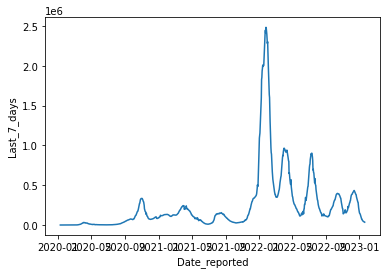

In [189]:
# Line chart

new_cases_7d = new_cases_last_7d(data_cases_deaths,"France")

sns.lineplot(data=new_cases_7d, x="Date_reported", y="Last_7_days");

### Number of new cases (7-day rolling average)

In [190]:

def new_cases_7d_average(data,country):

    pd.set_option('mode.chained_assignment', None)

    data_country = data[data["Country"] == country]
    new_cases_7d_average = data_country[["Date_reported", "New_cases"]]
    new_cases_7d_average["7_days_average"] = new_cases_7d_average["New_cases"].rolling(7).sum() / 7
    new_cases_7d_average["7_days_average"] = new_cases_7d_average["7_days_average"].round(decimals=2)

    new_cases_7d_average.drop(['New_cases'], axis = 1, inplace = True) 

    return new_cases_7d_average

new_cases_7d_average(data_cases_deaths,"France")

,Date_reported,7_days_average
80208,2020-01-03,NaN
80209,2020-01-04,NaN
80210,2020-01-05,NaN
80211,2020-01-06,NaN
80212,2020-01-07,NaN
...,...,...
81317,2023-01-16,6107.43
81318,2023-01-17,6046.86
81319,2023-01-18,5570.57
81320,2023-01-19,5321.86


<AxesSubplot:xlabel='Date_reported', ylabel='7_days_average'>

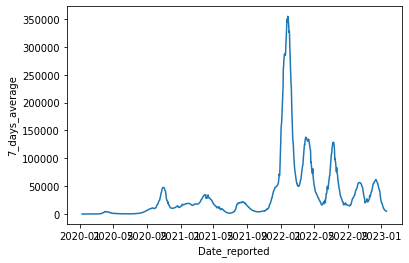

In [192]:
# Line chart

new_cases_7d_average = new_cases_7d_average(data_cases_deaths,"France")

sns.lineplot(data=new_cases_7d_average, x="Date_reported", y="7_days_average");

### Number of new deaths weekly (last 7 days)

In [194]:
def new_deaths_last_7d(data,country):

    pd.set_option('mode.chained_assignment', None)

    data_country = data[data["Country"] == country]
    new_deaths_7d = data_country[["Date_reported", "New_deaths"]]
    new_deaths_7d["Last_7_days"] = new_deaths_7d["New_deaths"].rolling(7).sum()

    new_deaths_7d.drop(['New_deaths'], axis = 1, inplace = True) 

    return new_deaths_7d

new_deaths_last_7d(data_cases_deaths,"France")

,Date_reported,Last_7_days
80208,2020-01-03,NaN
80209,2020-01-04,NaN
80210,2020-01-05,NaN
80211,2020-01-06,NaN
80212,2020-01-07,NaN
...,...,...
81317,2023-01-16,534.0
81318,2023-01-17,469.0
81319,2023-01-18,453.0
81320,2023-01-19,447.0


<AxesSubplot:xlabel='Date_reported', ylabel='Last_7_days'>

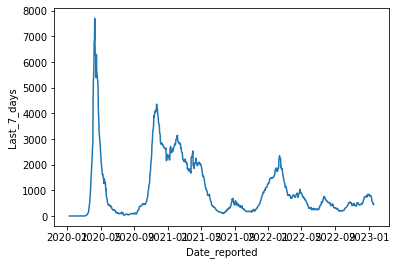

In [195]:
new_deaths_7d = new_deaths_last_7d(data_cases_deaths,"France")

sns.lineplot(data=new_deaths_7d, x="Date_reported", y="Last_7_days");

### Number of new deaths (7-day rolling average)

In [198]:
def new_deaths_7d_average(data,country):

    pd.set_option('mode.chained_assignment', None)

    data_country = data[data["Country"] == country]
    new_deaths_7d_average = data_country[["Date_reported", "New_deaths"]]
    new_deaths_7d_average["7_days_average"] = new_deaths_7d_average["New_deaths"].rolling(7).sum() / 7
    new_deaths_7d_average["7_days_average"] = new_deaths_7d_average["7_days_average"].round(decimals=2)

    new_deaths_7d_average.drop(['New_deaths'], axis = 1, inplace = True)
    
    return new_deaths_7d_average

new_deaths_7d_average(data_cases_deaths,"France")

,Date_reported,7_days_average
80208,2020-01-03,NaN
80209,2020-01-04,NaN
80210,2020-01-05,NaN
80211,2020-01-06,NaN
80212,2020-01-07,NaN
...,...,...
81317,2023-01-16,76.29
81318,2023-01-17,67.00
81319,2023-01-18,64.71
81320,2023-01-19,63.86


<AxesSubplot:xlabel='Date_reported', ylabel='7_days_average'>

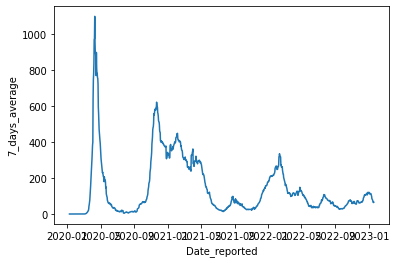

In [199]:
new_deaths_7d_average = new_deaths_7d_average(data_cases_deaths,"France")

sns.lineplot(data=new_deaths_7d_average, x="Date_reported", y="7_days_average");

### Number of cummulative cases (latest)

In [201]:
def cum_cases_latest(data,country):

    data_country = data[data["Country"] == country]
    cumulative_cases_latest = data_country["Cumulative_cases"].iloc[-1]
    
    return cumulative_cases_latest

cum_cases_latest(data_cases_deaths,"France")

38372611

### Number of cummulative deaths (latest)

In [200]:
def cum_deaths_latest(data,country):

    data_country = data[data["Country"] == country]
    cumulative_deaths_latest = data_country["Cumulative_deaths"].iloc[-1]
    
    return cumulative_deaths_latest

cum_deaths_latest(data_cases_deaths,"France")

160051

### Evolution of new cases

In [202]:
# All-time

def evol_cases_alltime(data,country):

    data_country = data[data["Country"] == country]
    evolution_new_cases = data_country[["Date_reported", "New_cases"]]
    evolution_new_cases = evolution_new_cases[evolution_new_cases["Date_reported"].dt.dayofweek < 5]
    
    return evolution_new_cases

evol_cases_alltime(data_cases_deaths,"France")

,Date_reported,New_cases
80208,2020-01-03,0
80211,2020-01-06,0
80212,2020-01-07,0
80213,2020-01-08,0
80214,2020-01-09,0
...,...,...
81317,2023-01-16,4166
81318,2023-01-17,1235
81319,2023-01-18,8381
81320,2023-01-19,5894


<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

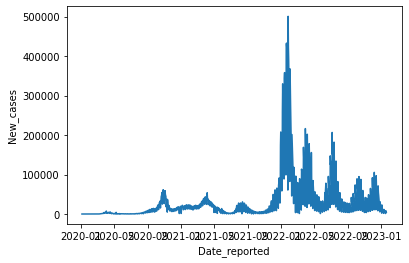

In [203]:
# Line chart

evolution_new_cases = evol_cases_alltime(data_cases_deaths,"France")

sns.lineplot(data=evolution_new_cases, x="Date_reported", y="New_cases");

In [210]:
# Specific dates

def evol_cases_dates(data,country,start_date,end_date):

    data_country = data[data["Country"] == country]
    evolution_new_cases = data_country[["Date_reported", "New_cases"]]
    evolution_new_cases_filtered = evolution_new_cases[(evolution_new_cases['Date_reported'] >= start_date) & (evolution_new_cases['Date_reported'] <= end_date)]
    evolution_new_cases_filtered = evolution_new_cases_filtered[evolution_new_cases_filtered["Date_reported"].dt.dayofweek < 5]
    
    return evolution_new_cases_filtered

evol_cases_dates(data_cases_deaths,"France","2020-05-24","2021-05-24")

,Date_reported,New_cases
80351,2020-05-25,689
80352,2020-05-26,649
80353,2020-05-27,587
80354,2020-05-28,552
80355,2020-05-29,316
...,...,...
80709,2021-05-18,13220
80710,2021-05-19,11514
80711,2021-05-20,11986
80712,2021-05-21,4817


<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

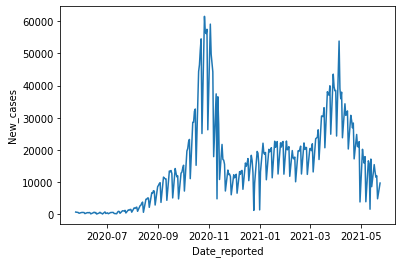

In [211]:
# Line chart

evolution_new_cases_filtered = evol_cases_dates(data_cases_deaths,"France","2020-05-24","2021-05-24")

sns.lineplot(data=evolution_new_cases_filtered, x="Date_reported", y="New_cases");

### Evolution of new deaths

In [212]:
# All-time

def evol_deaths_alltime(data,country):
    data_country = data[data["Country"] == country]
    evolution_new_deaths = data_country[["Date_reported", "New_deaths"]]
    evolution_new_deaths = evolution_new_deaths[evolution_new_deaths["Date_reported"].dt.dayofweek < 5]
    
    return evolution_new_deaths

evol_deaths_alltime(data_cases_deaths,"France")

,Date_reported,New_deaths
80208,2020-01-03,0
80211,2020-01-06,0
80212,2020-01-07,0
80213,2020-01-08,0
80214,2020-01-09,0
...,...,...
81317,2023-01-16,9
81318,2023-01-17,80
81319,2023-01-18,99
81320,2023-01-19,82


<AxesSubplot:xlabel='Date_reported', ylabel='New_deaths'>

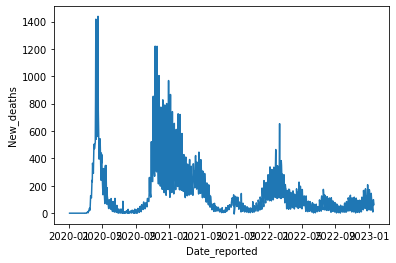

In [213]:
evolution_new_deaths = evol_deaths_alltime(data_cases_deaths,"France")

sns.lineplot(data=evolution_new_deaths, x="Date_reported", y="New_deaths");

In [214]:
# Specific dates

def evol_deaths_dates(data,country,start_date,end_date):
    data_country = data[data["Country"] == country]
    evolution_new_deaths = data_country[["Date_reported", "New_deaths"]]
    evolution_new_deaths_filtered = evolution_new_deaths[(evolution_new_deaths['Date_reported'] >= start_date) & (evolution_new_deaths['Date_reported'] <= end_date)]
    evolution_new_deaths_filtered = evolution_new_deaths_filtered[evolution_new_deaths_filtered["Date_reported"].dt.dayofweek < 5]
    
    return evolution_new_deaths_filtered

evol_deaths_dates(data_cases_deaths,"France","2020-05-24","2021-05-24")

,Date_reported,New_deaths
80351,2020-05-25,34
80352,2020-05-26,64
80353,2020-05-27,98
80354,2020-05-28,66
80355,2020-05-29,65
...,...,...
80709,2021-05-18,195
80710,2021-05-19,221
80711,2021-05-20,140
80712,2021-05-21,133


<AxesSubplot:xlabel='Date_reported', ylabel='New_deaths'>

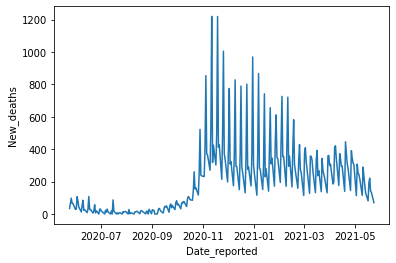

In [215]:
evolution_new_deaths_filtered = evol_deaths_dates(data_cases_deaths,"France","2020-05-24","2021-05-24")

sns.lineplot(data=evolution_new_deaths_filtered, x="Date_reported", y="New_deaths");

### Evolution of cumulative cases

In [216]:
def evol_cum_cases(data,country):

    data_country = data[data["Country"] == country]
    evolution_cumulative_cases = data_country[["Date_reported", "Cumulative_cases"]]

    return evolution_cumulative_cases

evol_cum_cases(data_cases_deaths,"France")

,Date_reported,Cumulative_cases
80208,2020-01-03,0
80209,2020-01-04,0
80210,2020-01-05,0
80211,2020-01-06,0
80212,2020-01-07,0
...,...,...
81317,2023-01-16,38353104
81318,2023-01-17,38354339
81319,2023-01-18,38362720
81320,2023-01-19,38368614


<AxesSubplot:xlabel='Date_reported', ylabel='Cumulative_cases'>

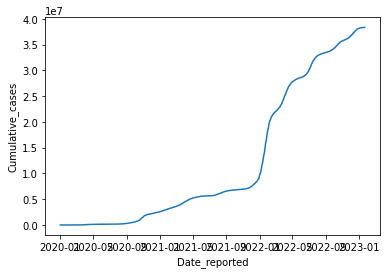

In [217]:
# Line chart

evolution_cumulative_cases = evol_cum_cases(data_cases_deaths,"France")

sns.lineplot(data=evolution_cumulative_cases, x="Date_reported", y="Cumulative_cases")

### Evolution of cumulative deaths

In [70]:
def evol_cum_deaths(data,country):
    data_country = data[data["Country"] == country]
    evolution_cumulative_deaths = data_country[["Date_reported", "Cumulative_deaths"]]
    
    return evolution_cumulative_deaths

evol_cum_deaths(data_cases_deaths,"France")

,Date_reported,Cumulative_deaths
80208,2020-01-03,0
80209,2020-01-04,0
80210,2020-01-05,0
80211,2020-01-06,0
80212,2020-01-07,0
...,...,...
81317,2023-01-16,159727
81318,2023-01-17,159807
81319,2023-01-18,159906
81320,2023-01-19,159988


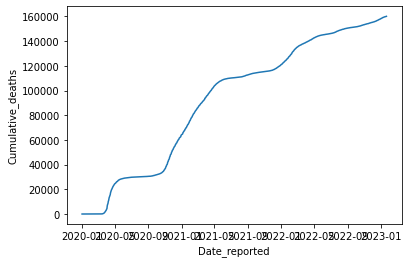

In [71]:
evolution_cumulative_deaths = evol_cum_deaths(data_cases_deaths,"France")

sns.lineplot(data=evolution_cumulative_deaths, x="Date_reported", y="Cumulative_deaths");

### New cases (weekly)

In [433]:
def new_cases_weekly(data,country):

    data_country = data[data["Country"] == country]
    new_cases_weekly = data_country[["Date_reported", "New_cases"]]
    new_cases_weekly["Weekly_cases"] = new_cases_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_cases"].sum()

    new_cases_weekly = new_cases_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_cases"].sum()
    new_cases_weekly = new_cases_weekly.to_frame()
    new_cases_weekly.reset_index(inplace=True)
    new_cases_weekly = new_cases_weekly.rename(columns={"New_cases": "Weekly_cases"})
    
    return new_cases_weekly

new_cases_weekly(data_cases_deaths,"France")

,Date_reported,Weekly_cases,Country
0,2020-01-06,0,France
1,2020-01-13,0,France
2,2020-01-20,0,France
3,2020-01-27,3,France
4,2020-02-03,3,France
...,...,...,...
155,2022-12-26,288522,France
156,2023-01-02,144771,France
157,2023-01-09,74496,France
158,2023-01-16,42752,France


### New deaths (weekly)

In [366]:
def new_deaths_weekly(data,country):

    data_country = data[data["Country"] == country]
    new_deaths_weekly = data_country[["Date_reported", "New_deaths"]]
    new_deaths_weekly["Weekly_deaths"] = new_deaths_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_deaths"].sum()

    new_deaths_weekly = new_deaths_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_deaths"].sum()
    new_deaths_weekly = new_deaths_weekly.to_frame()
    new_deaths_weekly.reset_index(inplace=True)
    new_deaths_weekly = new_deaths_weekly.rename(columns={"New_deaths": "Weekly_deaths"})

    return new_deaths_weekly

new_deaths_weekly(data_cases_deaths,"France")

,Date_reported,Weekly_deaths
0,2020-01-06,0
1,2020-01-13,0
2,2020-01-20,0
3,2020-01-27,0
4,2020-02-03,0
...,...,...
155,2022-12-26,788
156,2023-01-02,803
157,2023-01-09,799
158,2023-01-16,534


### New cases change chart

In [284]:
def new_cases_weekly_change(data,country):
    
    new_cases_week = new_cases_weekly(csv,country)
    
    new_cases_week.drop(new_cases_week.tail(1).index,inplace=True)
        
    new_cases_week['Percentage_change'] = new_cases_week['Weekly_cases'].pct_change().round(4) * 100
    
    new_cases_week.drop(['Weekly_cases'], axis=1, inplace=True)
    
    return new_cases_week

new_cases_weekly_change(data_cases_deaths,"France")

,Date_reported,Percentage_change
0,2020-01-06,NaN
1,2020-01-13,NaN
2,2020-01-20,NaN
3,2020-01-27,inf
4,2020-02-03,0.00
...,...,...
154,2022-12-19,-11.52
155,2022-12-26,-24.69
156,2023-01-02,-49.82
157,2023-01-09,-48.54


<AxesSubplot:xlabel='Date_reported', ylabel='Percentage_change'>

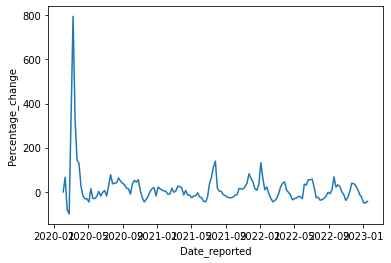

In [267]:
# Line chart

cases_weekly_change_chart = new_cases_weekly_change(data_cases_deaths,"France")

sns.lineplot(data=cases_weekly_change_chart, x="Date_reported", y="Percentage_change")

### New deaths change chart

In [274]:
def new_deaths_weekly_change(data,country):
    
    new_deaths_week = new_deaths_weekly(data,country)
    
    new_deaths_week.drop(new_deaths_week.tail(1).index,inplace=True)
    
    new_deaths_week['Percentage_change'] = new_deaths_week['Weekly_deaths'].pct_change().round(4) * 100
    
    new_deaths_week.drop(['Weekly_deaths'], axis=1, inplace=True)
    
    return new_deaths_week

new_deaths_weekly_change(data_cases_deaths,"France")

,Date_reported,Percentage_change
0,2020-01-06,NaN
1,2020-01-13,NaN
2,2020-01-20,NaN
3,2020-01-27,NaN
4,2020-02-03,NaN
...,...,...
154,2022-12-19,36.50
155,2022-12-26,7.50
156,2023-01-02,1.90
157,2023-01-09,-0.50


<AxesSubplot:xlabel='Date_reported', ylabel='Percentage_change'>

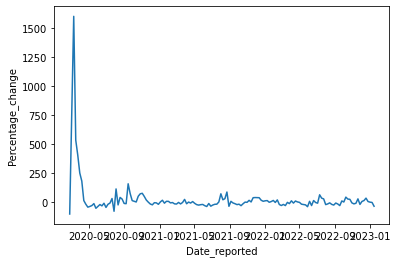

In [275]:
# Line charts

deaths_weekly_change_chart = new_deaths_weekly_change(data_cases_deaths,"France")

sns.lineplot(data=deaths_weekly_change_chart, x="Date_reported", y="Percentage_change")

### Top 10 weeks with most new cases (percentage)

In [288]:
def top_10_weeks_cases(data,country):
    
    cases_weekly = new_cases_weekly(data,country)
    
    cases_weekly = cases_weekly.nlargest(10,'Weekly_cases')
    
    return cases_weekly

top_10_weeks_cases(data_cases_deaths,"France")

,Date_reported,Weekly_cases
107,2022-01-24,2450265
108,2022-01-31,2282303
106,2022-01-17,2001083
105,2022-01-10,1828201
109,2022-02-07,1638454
104,2022-01-03,1123897
117,2022-04-04,951228
118,2022-04-11,932409
110,2022-02-14,910350
131,2022-07-11,902063


### Top 10 weeks with most new deaths (percentage)

In [291]:
def top_10_weeks_deaths(data,country):
    
    deaths_weekly = new_deaths_weekly(data,country)
    
    deaths_weekly = deaths_weekly.nlargest(10,'Weekly_deaths')
    
    return deaths_weekly

top_10_weeks_deaths(data_cases_deaths,"France")

,Date_reported,Weekly_deaths
14,2020-04-13,6310
13,2020-04-06,5462
15,2020-04-20,5315
46,2020-11-23,4169
45,2020-11-16,4096
47,2020-11-30,3581
44,2020-11-09,3402
16,2020-04-27,3132
56,2021-02-01,3005
57,2021-02-08,2873


### Cases/Deaths @ Global/Regional Level 🌍

We will use the same exact functions defined before and use a dictionary with the `Country` and `WHO_region` in order to filter out the right country.

### Top 15 countries with most new cases / 100k today / this week

In [29]:
def top_15_new_cases_lastweek(data):
    
    pd.options.mode.chained_assignment = None
    
    cases_per_100k = {}
    
    # Iterate over countries
    for code, pop in dictionary_population.items():
        
        # Generate weekly cases for each country
        data_country = data[data["Country_code"] == code]
        new_cases_weekly = data_country[["Date_reported", "New_cases"]]
        new_cases_weekly["Weekly_cases"] = new_cases_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_cases"].sum()

        new_cases_weekly = new_cases_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_cases"].sum()
        new_cases_weekly = new_cases_weekly.to_frame()
        new_cases_weekly.reset_index(inplace=True)
        new_cases_weekly = new_cases_weekly.rename(columns={"New_cases": "Weekly_cases"})
        
        # Select the last week
        last_week = new_cases_weekly['Weekly_cases'].iloc[-1]
        
        # Calculate the incidence (cases / 100k people) for the country
        incidence = (last_week / (pop / 100000))
        
        # Add incidence to dictionary for given country
        cases_per_100k[code] = incidence
        
    # Sort countries by incidence
    cases_per_100k_sorted = dict(sorted(cases_per_100k.items(), key=lambda x:x[1], reverse=True))
    
    # Select top 15 countries
    top_15_cases_incidence = {key: cases_per_100k_sorted[key] for key in list(cases_per_100k_sorted)[:15]}
    
    # Turn country codes to country names
    top_15_cases_incidence = dict((dictionary_countrycodes[key], value) for (key, value) in top_15_cases_incidence.items())

    return top_15_cases_incidence


In [181]:
top_15_new_cases_lastweek(data_cases_deaths)

{'Japan': 320.0013770301907,
 'Republic of Korea': 259.4235186130306,
 'Cyprus': 220.89499329529443,
 'Réunion': 118.31519167061052,
 'Australia': 117.40161118596728,
 'Puerto Rico': 109.42275504894438,
 'Austria': 86.27142697739932,
 'Slovenia': 74.13840883832685,
 'Germany': 57.503241359902525,
 'Serbia': 54.15284738885132,
 'Chile': 48.81197940449385,
 'Lithuania': 47.37538912942355,
 'Belize': 39.736331833580216,
 'Montenegro': 37.47679816251098,
 'Trinidad and Tobago': 37.084911585712234}

### Top 15 countries with most new deaths / 100k this week

In [34]:
def top_15_new_deaths_lastweek(data):
    
    pd.options.mode.chained_assignment = None
    
    deaths_per_100k = {}
    
    # Iterate over countries
    for code, pop in dictionary_population.items():

        # Generate weekly cases for each country
        data_country = data[data["Country_code"] == code]
        new_deaths_weekly = data_country[["Date_reported", "New_deaths"]]
        new_deaths_weekly["Weekly_deaths"] = new_deaths_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_deaths"].sum()

        new_deaths_weekly = new_deaths_weekly.groupby([pd.Grouper(key="Date_reported", freq="W-MON")])["New_deaths"].sum()
        new_deaths_weekly = new_deaths_weekly.to_frame()
        new_deaths_weekly.reset_index(inplace=True)
        new_deaths_weekly = new_deaths_weekly.rename(columns={"New_deaths": "Weekly_deaths"})
        
        # Select the last week
        last_week = new_deaths_weekly['Weekly_deaths'].iloc[-1]
        
        # Calculate the incidence (cases / 100k people) for the country
        incidence = (last_week / (pop / 100000))
        
        # Add incidence to dictionary for given country
        deaths_per_100k[code] = incidence
        
    # Sort countries by incidence
    deaths_per_100k_sorted = dict(sorted(deaths_per_100k.items(), key=lambda x:x[1], reverse=True))
    
    # Select top 15 countries
    top_15_deaths_incidence = {key: deaths_per_100k_sorted[key] for key in list(deaths_per_100k_sorted)[:15]}
    
    # Turn country codes to country names
    top_15_deaths_incidence = dict((dictionary_countrycodes[key], value) for (key, value) in top_15_deaths_incidence.items())

    return top_15_deaths_incidence

In [35]:
top_15_new_deaths_lastweek(data)

{'Japan': 1.224609605225836,
 'Australia': 1.2068342165218642,
 'Croatia': 0.8895038545167029,
 'Ireland': 0.8609084305759437,
 'Cyprus': 0.8282526932706953,
 'Denmark': 0.6859411558520041,
 'Puerto Rico': 0.6261674108666345,
 'France': 0.48077221276687043,
 'Latvia': 0.47329859672224944,
 'Chile': 0.470804645418974,
 'Serbia': 0.4197895146422583,
 'Jamaica': 0.37147591772281213,
 'Slovakia': 0.3480601235393611,
 'Luxembourg': 0.3163180578071251,
 'Republic of Korea': 0.289683898667877}

### Top 15 countries with highest total incidence of deaths per 100k

In [37]:
def top_15_total_death_incidence(data):
    
    total_deaths_per_100k = {}
    
    for code, pop in dictionary_population.items():
        
        data_country = data[data["Country_code"] == code]
        cumulative_deaths_latest = data_country["Cumulative_deaths"].iloc[-1]
        
        # Calculate incidence of deaths in population
        incidence = (cumulative_deaths_latest / (pop / 100000))
        
        # Add incidence to dictionary for given country
        total_deaths_per_100k[code] = incidence
    
    # Sort countries by incidence
    deaths_per_100k_sorted = dict(sorted(total_deaths_per_100k.items(), key=lambda x:x[1], reverse=True))
    
    # Select top 15 countries
    top_15_deaths_incidence = {key: deaths_per_100k_sorted[key] for key in list(deaths_per_100k_sorted)[:15]}
    
    # Turn country codes to country names
    top_15_deaths_incidence = dict((dictionary_countrycodes[key], value) for (key, value) in top_15_deaths_incidence.items())
    
    return top_15_deaths_incidence

In [38]:
top_15_total_death_incidence(data)

{'Peru': 662.9292154282172,
 'Bulgaria': 550.8216202357979,
 'Hungary': 497.3967059506985,
 'Bosnia and Herzegovina': 495.2427979023505,
 'North Macedonia': 462.37364283040057,
 'Republic of Moldova': 456.3720958660259,
 'Georgia': 455.27732902530965,
 'Montenegro': 449.3998886955179,
 'Croatia': 439.83494761810636,
 'Slovenia': 426.9267653464602,
 'Czechia': 395.134226933321,
 'Slovakia': 382.81117903168575,
 'Romania': 350.01332305098333,
 'Lithuania': 340.8594840233299,
 'Chile': 332.69671826668144}

## Vaccinations @ Country Level ⛳️

### Number of weekly vaccinations per country

In [81]:
def new_vaccinations_weekly(data,country):

    data_country = data[data["location"] == country]
    new_vaccinations_weekly = data_country[["date", "daily_vaccinations"]]
    new_vaccinations_weekly["Weekly_vaccinations"] = new_vaccinations_weekly.groupby([pd.Grouper(key="date", freq="W-MON")])["daily_vaccinations"].sum()

    new_vaccinations_weekly = new_vaccinations_weekly.groupby([pd.Grouper(key="date", freq="W-MON")])["daily_vaccinations"].sum()
    new_vaccinations_weekly = new_vaccinations_weekly.to_frame()
    new_vaccinations_weekly.reset_index(inplace=True)
    new_vaccinations_weekly = new_vaccinations_weekly.rename(columns={"daily_vaccinations": "Weekly_vaccinations"})
    
    return new_vaccinations_weekly

new_vaccinations_weekly(data_vaccination,"France")

,date,Weekly_vaccinations
0,2020-12-28,705.0
1,2021-01-04,4128.0
2,2021-01-11,76111.0
3,2021-01-18,312439.0
4,2021-01-25,618340.0
...,...,...
104,2022-12-26,368861.0
105,2023-01-02,160830.0
106,2023-01-09,203469.0
107,2023-01-16,207841.0


### Total number of vaccinated people per country

In [96]:
def total_vaccinations_country(data,country):
    data_country = data[data["location"] == country]
    vaccinations_total = data_country[["people_fully_vaccinated"]]
    
    vaccinations_total = vaccinations_total.iloc[-1][0]
    
    return vaccinations_total

In [102]:
total_vaccinations_country(data_vaccination,"France")

53148127.0

### Total % of vaccinated people per country

In [120]:
def total_vaccinations_rate_country(data,country):
    data_country = data[data["location"] == country]
    vaccinations_total = data_country[["people_vaccinated_per_hundred"]]
    
    vaccinations_total = vaccinations_total.iloc[-1][0]
    
    return vaccinations_total

In [122]:
total_vaccinations_rate_country(data_vaccination,"France")

80.58

### Total % of vaccinated people per country (evolution)

In [127]:
def vaccinations_rate_evol_country(data,country):
    data_country = data[data["location"] == country]
    vaccinations_total = data_country[["date","people_vaccinated_per_hundred"]]

    return vaccinations_total

In [129]:
vaccinations_rate_evol = vaccinations_rate_evol_country(data_vaccination,"France")

<AxesSubplot:xlabel='date', ylabel='people_vaccinated_per_hundred'>

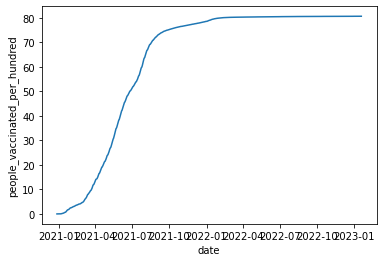

In [130]:
sns.lineplot(data=vaccinations_rate_evol, x="date", y="people_vaccinated_per_hundred")

## Vaccinations @ Regional/Global Level 🌍

### Top 15 countries with highest vaccination rate

In [176]:
def top_15_vaccinations_rate(data):
    vaccinations_rates = {}
    
    for code, country in dictionary_population_iso.items():
        
        data_country = data[data["iso_code"] == code]
        
        if pd.isna(data_country["people_vaccinated_per_hundred"].iloc[-1]) == False:
        
            vaccination_rate_latest = data_country["people_vaccinated_per_hundred"].iloc[-1]
            
        else:
            
            vaccination_rate_latest = data_country["people_vaccinated_per_hundred"].iloc[-2]
        
        # Add vaccination rate to dictionary for given country
        vaccinations_rates[code] = vaccination_rate_latest
    
    # Sort countries by vaccination rate
    vaccinations_rates_sorted = dict(sorted(vaccinations_rates.items(), key=lambda x:x[1], reverse=True))
    
    # Select top 15 countries
    top_15_vaccination_rates = {key: vaccinations_rates_sorted[key] for key in list(vaccinations_rates_sorted)[:15]}
    
    # Turn country codes to country names
    top_15_vaccination_rates = dict((dictionary_isocodes[key], value) for (key, value) in top_15_vaccination_rates.items())
    
    return top_15_vaccination_rates

In [177]:
top_15_vaccinations_rate(data_vaccination)

{'United Arab Emirates': 105.83,
 'Brunei': 100.31,
 'Bulgaria': nan,
 'Macao': 97.54,
 'Cuba': 95.63,
 'Chile': 92.26,
 'China': 91.89,
 'Argentina': 91.05,
 'Cambodia': 90.92,
 'Canada': 90.32,
 'Bhutan': 89.35,
 'Costa Rica': 88.68,
 'Bangladesh': 87.99,
 'Brazil': 87.76,
 'Australia': 84.95}

We will use the same exact functions defined before and replace the `Country` filtering with the `WHO_region` filtering + group by / sum all data. See package definition.

# Google Sheets API

Template for dumping dataframe to Google Sheet using API

In [28]:
# Variables

SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SAMPLE_SPREADSHEET_ID = '1ESRCmW23Rb69f5mIfBhV_yy1FsC92f4W8AmxglWnClU'
SAMPLE_RANGE_NAME = 'Sheet1!A2:E'

In [35]:
if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'client_secret_59863169565-0g6psho3kj61kokqdsrqiao73m0o1i4q.apps.googleusercontent.com.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

service = build('sheets', 'v4', credentials=creds)


# How the input data should be interpreted.
value_input_option = ''

insert_data_option = ''

value_range_body = {
    "majorDimension": "ROWS",
    "values": [["valuea3"], ["valuea6"], ["valuea9"]]
}

# Call the Sheets API
sheet = service.spreadsheets()

request = sheet.values().clear(spreadsheetId=SAMPLE_SPREADSHEET_ID, range=SAMPLE_RANGE_NAME).execute()


result = sheet.values().append(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME, valueInputOption="USER_ENTERED", body=value_range_body).execute()

print(result)

{'spreadsheetId': '1ESRCmW23Rb69f5mIfBhV_yy1FsC92f4W8AmxglWnClU', 'updates': {'spreadsheetId': '1ESRCmW23Rb69f5mIfBhV_yy1FsC92f4W8AmxglWnClU', 'updatedRange': 'Sheet1!A2:A4', 'updatedRows': 3, 'updatedColumns': 1, 'updatedCells': 3}}
